# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases: 
  * (I) entendimento do problema e planejamento;
* (II) Execução 
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de 
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_people = pd.read_csv('../dados/ifood_people.csv')
df_prev_camp = pd.read_csv('../dados/ifood_previous_campaing.csv')
df_profile = pd.read_csv('../dados/ifood_purchase_profile.csv')

In [3]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 122.6+ KB


In [4]:
df_prev_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             2240 non-null   int64
 1   AcceptedCmp3   2240 non-null   int64
 2   AcceptedCmp4   2240 non-null   int64
 3   AcceptedCmp5   2240 non-null   int64
 4   AcceptedCmp1   2240 non-null   int64
 5   AcceptedCmp2   2240 non-null   int64
 6   Complain       2240 non-null   int64
 7   Z_CostContact  2240 non-null   int64
 8   Z_Revenue      2240 non-null   int64
 9   Response       2240 non-null   int64
dtypes: int64(10)
memory usage: 175.1 KB


In [5]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Dt_Customer          2240 non-null   object
 2   Recency              2240 non-null   int64 
 3   MntWines             2240 non-null   int64 
 4   MntFruits            2240 non-null   int64 
 5   MntMeatProducts      2240 non-null   int64 
 6   MntFishProducts      2240 non-null   int64 
 7   MntSweetProducts     2240 non-null   int64 
 8   MntGoldProds         2240 non-null   int64 
 9   NumDealsPurchases    2240 non-null   int64 
 10  NumWebPurchases      2240 non-null   int64 
 11  NumCatalogPurchases  2240 non-null   int64 
 12  NumStorePurchases    2240 non-null   int64 
 13  NumWebVisitsMonth    2240 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 245.1+ KB


In [6]:
parcial = pd.merge(df_people, df_profile, on='ID')

In [7]:
completo = pd.merge(parcial, df_prev_camp, on='ID')

In [8]:
completo.sort_values('ID')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,1,0,0,0,0,0,0,3,11,0
822,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,0,3,11,1
1511,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,8,0,0,0,0,0,0,3,11,0
1654,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,6,0,0,0,0,0,0,3,11,0
1906,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,11178,1972,Master,Single,42394.0,1,0,2014-03-23,69,15,...,7,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2183,11187,1978,Basic,Single,26487.0,1,0,2013-05-20,23,2,...,5,0,0,0,0,0,0,3,11,0
997,11188,1957,Graduation,Together,26091.0,1,1,2014-02-25,84,15,...,5,0,0,0,0,0,0,3,11,0


In [9]:
completo = completo.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [10]:
completo['MntTotal'] = completo[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts' , 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

### Análise - Estado Civil

A seguir faremos uma análise sobre renda e consumo dependendo do estado civil do usuário. 

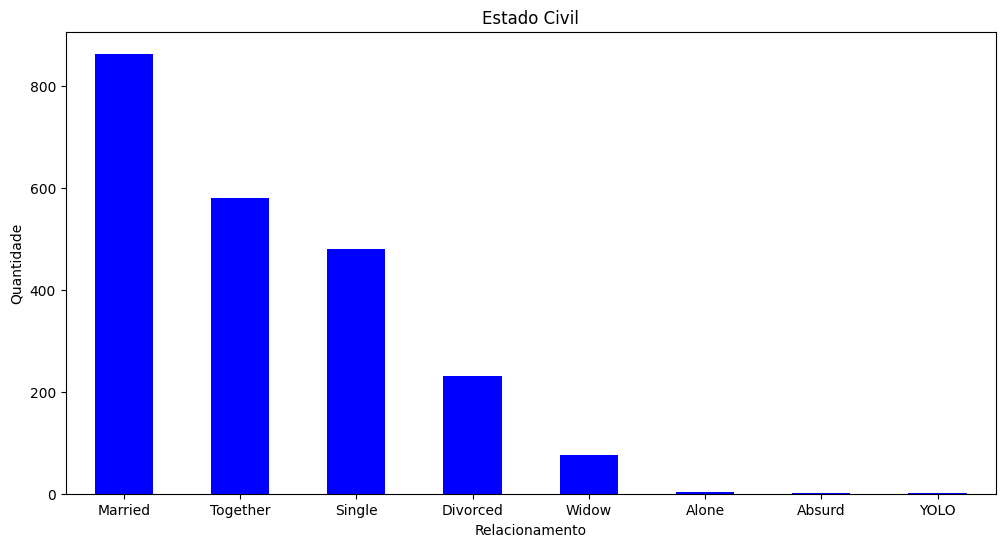

In [11]:
estado_civil = completo.value_counts('Marital_Status')

plt.figure(figsize=(12, 6))
estado_civil.plot(kind='bar', color='blue')
plt.title('Estado Civil')
plt.xlabel('Relacionamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


In [12]:
100*completo.value_counts('Marital_Status')/len(completo)

Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: count, dtype: float64

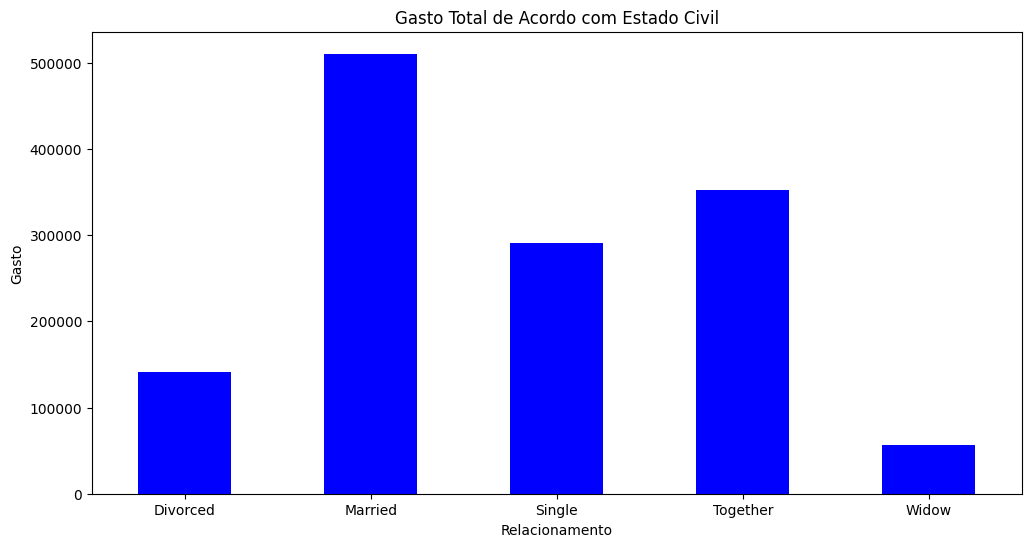

In [13]:
gasto_total = completo.groupby('Marital_Status')['MntTotal'].sum().drop(['Absurd', 'YOLO','Alone'])


plt.figure(figsize=(12, 6))
gasto_total.plot(kind='bar', color='blue')
plt.title('Gasto Total de Acordo com Estado Civil')
plt.xlabel('Relacionamento')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

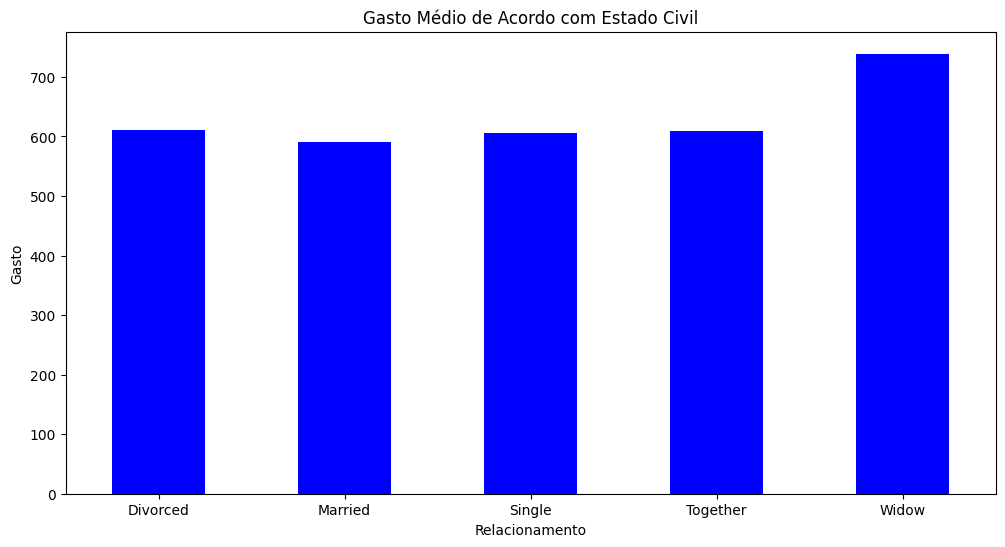

In [14]:
gasto_medio = completo.groupby('Marital_Status')['MntTotal'].mean().drop(['Absurd', 'YOLO','Alone'])


plt.figure(figsize=(12, 6))
gasto_medio.plot(kind='bar', color='blue')
plt.title('Gasto Médio de Acordo com Estado Civil')
plt.xlabel('Relacionamento')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

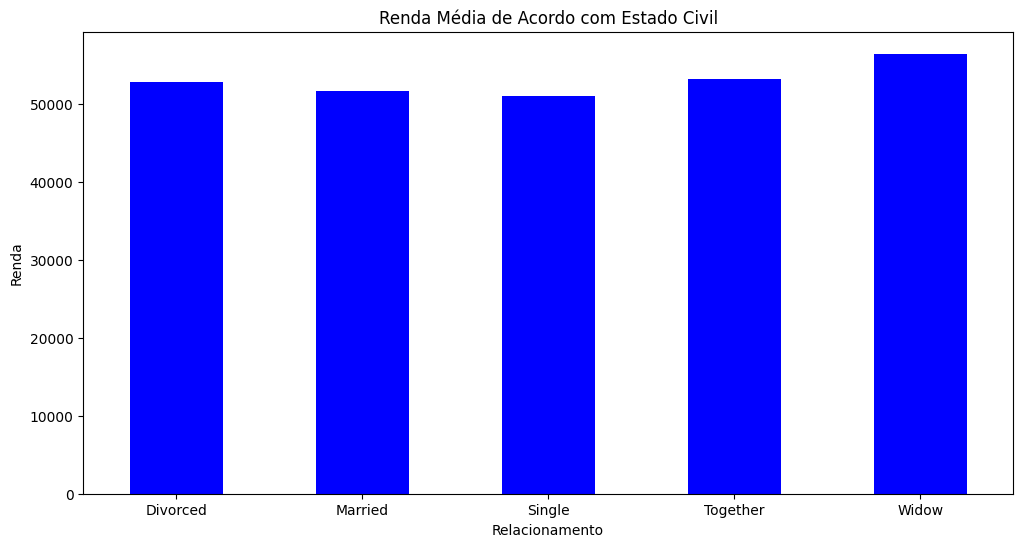

In [15]:
renda_media = completo.groupby('Marital_Status')['Income'].mean().drop(['Absurd', 'YOLO','Alone'])

plt.figure(figsize=(12, 6))
renda_media.plot(kind='bar', color='blue')
plt.title('Renda Média de Acordo com Estado Civil')
plt.xlabel('Relacionamento')
plt.ylabel('Renda')
plt.xticks(rotation=0)
plt.show()

### Resultados do Estado Civil

O grupo de casados representa aproximadamente 38,6% da base de dados, seguido de pessoas juntas com 25,9% e pessoas solteiras em terceiro lugar com 21,4%.
Apesar disso, a média de gastos dos solteiros é maior que dos casados.
Divorciados e viúvos tem maiores médias de gastos, porém tem menos representatividade no faturamento total.


Dados com informaçoes como "sozinho", "absurdo" e "YOLO" foram descartados pelo fato de juntos representarem menos de 1% dos dados.



### Análise de Formação Acadêmica


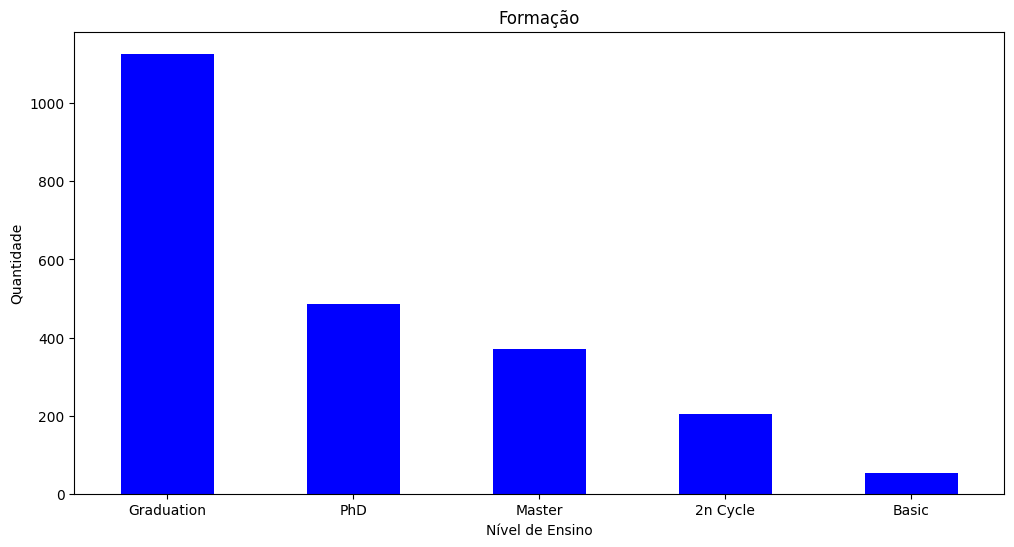

In [16]:
formacao = completo.value_counts('Education')

plt.figure(figsize=(12, 6))
formacao.plot(kind='bar', color='blue')
plt.title('Formação')
plt.xlabel('Nível de Ensino')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

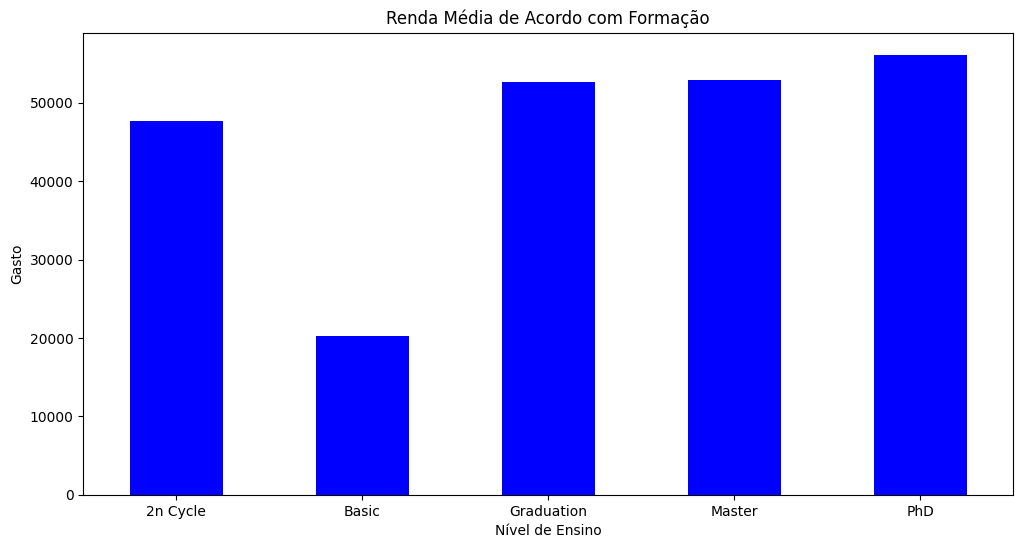

In [17]:
renda_media_formacao = completo.groupby('Education')['Income'].mean()


plt.figure(figsize=(12, 6))
renda_media_formacao.plot(kind='bar', color='blue')
plt.title('Renda Média de Acordo com Formação')
plt.xlabel('Nível de Ensino')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

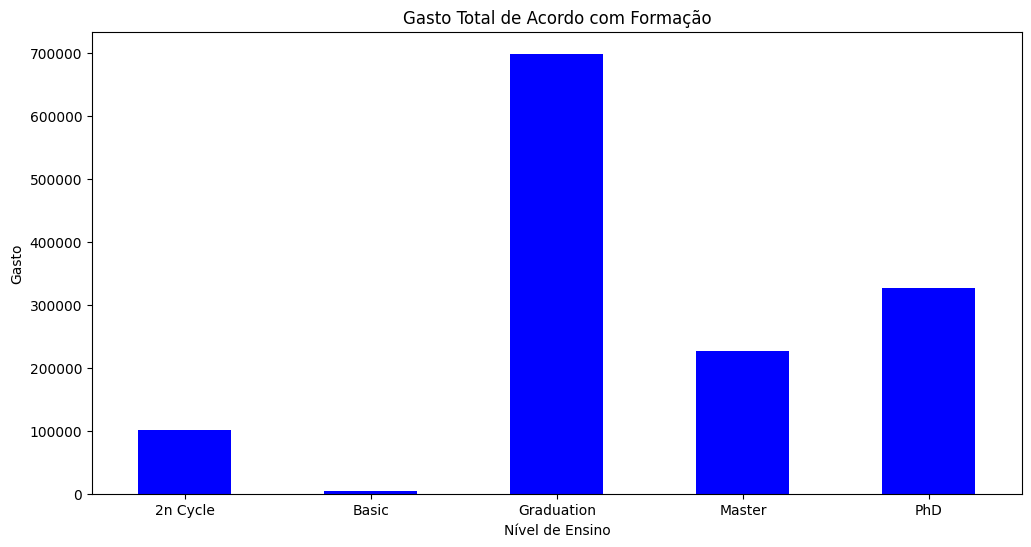

In [18]:
gasto_total_formacao = completo.groupby('Education')['MntTotal'].sum()


plt.figure(figsize=(12, 6))
gasto_total_formacao.plot(kind='bar', color='blue')
plt.title('Gasto Total de Acordo com Formação')
plt.xlabel('Nível de Ensino')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

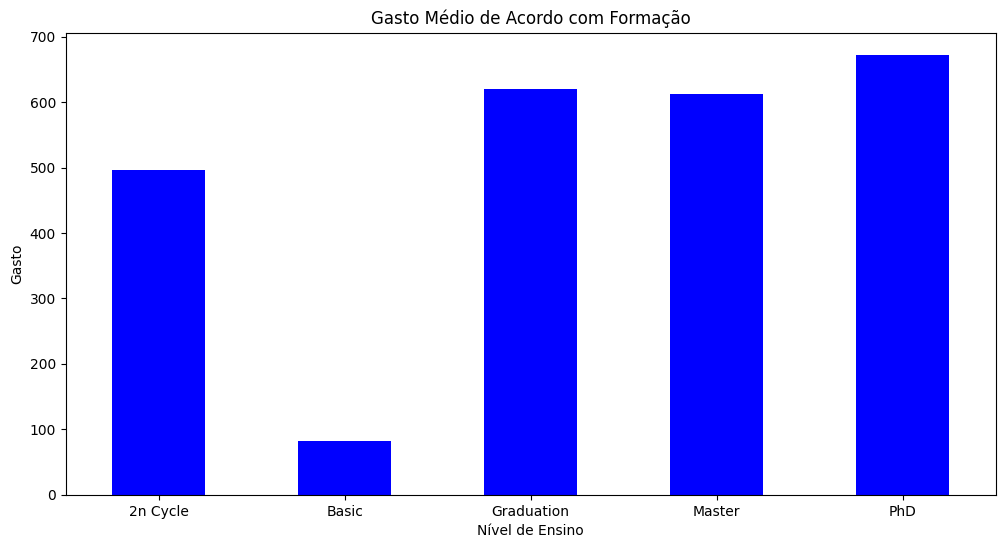

In [19]:
gasto_medio_formacao = completo.groupby('Education')['MntTotal'].mean()


plt.figure(figsize=(12, 6))
gasto_medio_formacao.plot(kind='bar', color='blue')
plt.title('Gasto Médio de Acordo com Formação')
plt.xlabel('Nível de Ensino')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

### Resultados da Graduação

A relação que parece existir na questão de graduação é que melhores formações levam a melhores salários o que reflete em maior consumo, porém, não parece haver nada muito significante além disso.

### Análise de Campanhas Anteriores e de Reclamações





In [20]:
100*completo['Complain'].value_counts()/len(completo)

# o número de reclamantes é muito pequeno então não vamos tratar isso


Complain
0    99.0625
1     0.9375
Name: count, dtype: float64

In [21]:
# Cria coluna de total de participações nas campanahs anteriores
completo['Camps'] = completo[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis=1)

In [22]:
100*completo.value_counts('Camps')/len(completo)

Camps
0    72.812500
1    16.517857
2     6.339286
3     2.276786
4     1.607143
5     0.446429
Name: count, dtype: float64

In [23]:
# completo.groupby('Camps')['Marital_Status'].value_counts()

completo.pivot_table(index='Camps', 
                    columns='Marital_Status', 
                    # values='SomeValue',  # Replace 'SomeValue' with any column, e.g., 'Marital_Status', with aggfunc='count'
                    aggfunc='size',  # Size will count occurrences
                    fill_value=0)  # Fill missing values with 0

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Camps,,,,,,,,
0,1,2,163,647,332,435,50,1
1,0,0,41,128,88,97,15,1
2,0,1,18,54,35,27,7,0
3,1,0,3,18,17,10,2,0
4,0,0,5,15,5,8,3,0
5,0,0,2,2,3,3,0,0


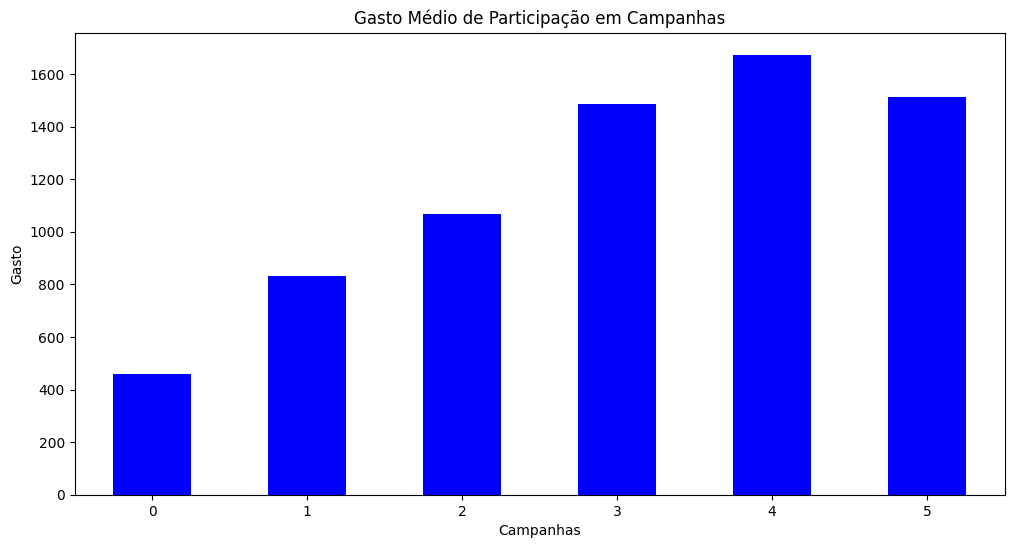

In [24]:
gasto_campanha = completo.groupby('Camps')['MntTotal'].mean()


plt.figure(figsize=(12, 6))
gasto_campanha.plot(kind='bar', color='blue')
plt.title('Gasto Médio de Participação em Campanhas')
plt.xlabel('Campanhas')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

### Resultados da Participação de Campanhas

As campanhas claramente mostram aumento de gastos conforme participações, porém, parece haver um limite de eficiência a partir da quarta campanha, apesar do tamanho da amostra ser muito pequena.
Além disso, mais de 72% da base não participou de nenhuma campanha, sendo que a participação em uma campanha já quase dobra o gasto médio do usuário.

### Análise de Tamanho do Núcleo Familiar

In [30]:
completo_fam = completo.copy()


values_to_remove = ['Absurd', 'YOLO', 'Alone']

completo_fam = completo_fam[~completo_fam['Marital_Status'].isin(values_to_remove)]


mapa_familias = {'Single': 1, 'Married': 2, 'Together': 2, 'Widow': 1}


completo_fam['Marital_Status'] = completo_fam['Marital_Status'].map(mapa_familias)

completo_fam['Household_Size'] = completo_fam[['Marital_Status', 'Kidhome', 'Teenhome']].sum(axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal,Camps,Household_Size
0,5524,1957,Graduation,1.0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,1617,1,1.0
1,2174,1954,Graduation,1.0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,27,0,3.0
2,4141,1965,Graduation,2.0,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,2.0
3,6182,1984,Graduation,2.0,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,53,0,3.0
4,5324,1981,PhD,2.0,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,422,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,2.0,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,0,1341,0,3.0
2236,4001,1946,PhD,2.0,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,0,444,1,5.0
2237,7270,1981,Graduation,NaN,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,0,1241,1,0.0
2238,8235,1956,Master,2.0,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,0,843,0,3.0


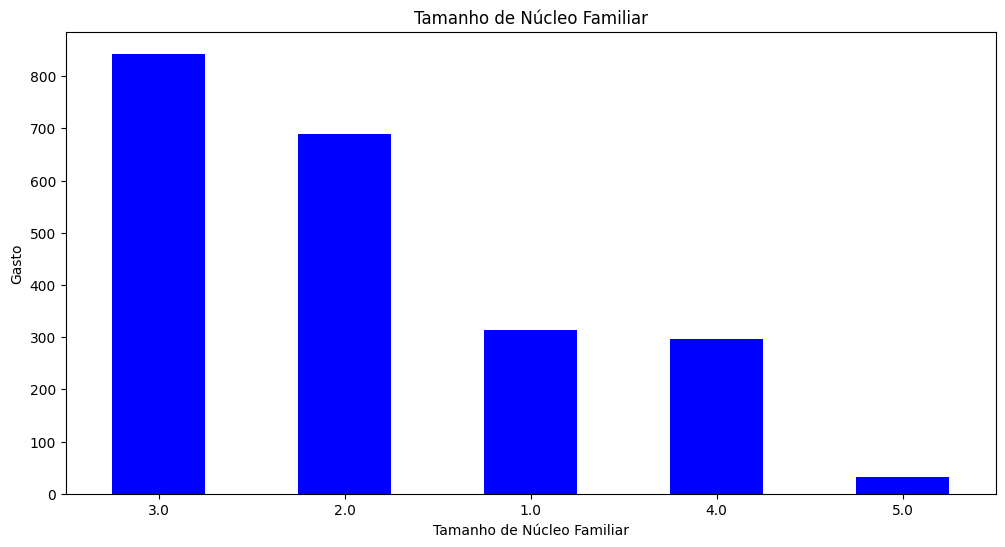

In [40]:
# completo_fam.['Household_Size'].value_counts()


plt.figure(figsize=(12, 6))
completo_fam['Household_Size'].value_counts().drop(0).plot(kind='bar', color='blue')
plt.title('Tamanho de Núcleo Familiar')
plt.xlabel('Tamanho de Núcleo Familiar')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

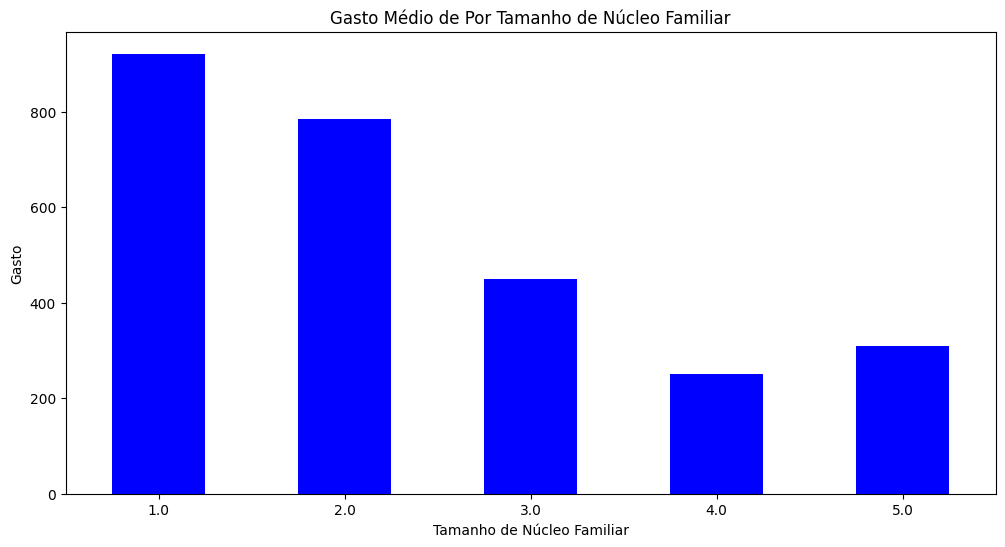

In [35]:
gasto_tamanho = completo_fam.groupby('Household_Size')['MntTotal'].mean().drop(0)


plt.figure(figsize=(12, 6))
gasto_tamanho.plot(kind='bar', color='blue')
plt.title('Gasto Médio de Por Tamanho de Núcleo Familiar')
plt.xlabel('Tamanho de Núcleo Familiar')
plt.ylabel('Gasto')
plt.xticks(rotation=0)
plt.show()

In [60]:
completo['Kids'] = completo_fam[['Kidhome', 'Teenhome']].sum(axis=1)

kids = completo.copy()

values_to_remove = ['Absurd', 'YOLO', 'Alone']

kids= kids[~kids['Marital_Status'].isin(values_to_remove)]

gasto_kids = kids.groupby(['Marital_Status', 'Kids'])['MntTotal'].mean()

gasto_kids.unstack()

Kids,0.0,1.0,2.0,3.0
Marital_Status,,,,
Divorced,1009.586207,580.366667,265.306122,93.200000
Married,1049.000000,492.928731,253.023810,314.705882
Single,1130.125749,371.441964,204.972603,263.437500
Together,1192.240260,458.270903,247.446429,301.533333
Widow,1151.851852,639.727273,275.176471,NaN


### Resultados de Núcleo Familiar

Familias sem filhos tem médias maiores de gastos.

### Conclusão

Os dados levantados apontam que o foco deve ser em familias sem filhos, com ensino superior à graduação, e que não tenha participado de muitas campanhas anteriores.
